# Phase 2 project:
## Movie Studio Analysis

# Business Understanding 

A company is interested in entering the movie studio industry. This is based on performances of films from studios such as Warner Bros, Sony, and Paramount Pictures.
They have no background/knowledge on the film industry, but are excited to try it out. They would like an analysis on the movies that have been performing well to make a data-driven decision. 

**Key focus points:**
1. Which genre of movies are performing well in the Box Office
2. How much revenue are they making
3. The ratings of the movies and their respective budget 
4. The runtime of the movies that are performing well

The focus points are to guide the company into ensuring the films produced and released are performing well (ratings) at the Box Office, are a good investment (ROI) and they work well with the given budget. 

**Datasets used:**
- IMDB dataset
- bom.movie_gross dataset
- 


**Outcome:**
- 3 recommendations for the potential new movie studio. This helps guide the company to draw an appropriate and data-driven decision. 


# Data Understanding 

In this section, we'll be going through the datasets and choosing the most appropriate for this analysis/project.

In [69]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

The provided datasets are:
- bom.movie_gross
- imdb
- rt.movie_info
- rt.reviews
- tmdb.movies
- tn.movies_budgets

In [70]:
movie_gross = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/bom.movie_gross.csv.gz")
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [71]:
rotten_tomatoes = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/rt.movie_info.tsv.gz", sep = '\t')
rotten_tomatoes.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [72]:
reviews = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/rt.reviews.tsv.gz", sep = '\t', encoding='cp1252')
reviews.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [73]:
tmdb = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/tmdb.movies.csv.gz")
tmdb.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [74]:
movie_budgets = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/tn.movie_budgets.csv.gz")
movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [75]:
imdb = 'C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/im.db'

# Opening up a connection
conn = sqlite3.connect(imdb)

In [76]:
table_name = """
SELECT name 
AS 'Table Names' 
FROM sqlite_master 
WHERE type='table';"""

pd.read_sql(table_name, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [77]:
query_one= """
SELECT *
FROM movie_basics
LIMIT 2;
"""
pd.read_sql(query_one, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [78]:
query_two= """
SELECT *
FROM movie_ratings
LIMIT 2;
"""
pd.read_sql(query_two, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [79]:
conn.close()

#### From viewing the data above and getting a glimpse of their columns and data in the dataset. The choices are the compulsory IMDb SQLite dataset, bom.movie_gross, and the optional tn. movie_budgets datasets.

# Data Cleaning 

### Box Office Mojo Dataset

In [80]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [81]:
# from looking at the first 2 rows of the dataset. We need to remove the year eg 2010 in Alce in Wonderland. And then for ease in merging,
# have all the letters of the title in small/lowercase 

movie_gross['title_new'] = movie_gross['title'].str.lower().str.strip()
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year,title_new
0,Toy Story 3,BV,415000000.0,652000000,2010,toy story 3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,alice in wonderland (2010)


In [ ]:
#we now remove the year (2010 for example)

movie_gross[title_new].str.replace(r'\s+\(\d{4}\)$', '', regex=True)

In [82]:
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'title_new'],
      dtype='object')

In [83]:
# we drop the 'title' column as its not needed

movie_gross = movie_gross.drop('title', axis=1) 
movie_gross

,studio,domestic_gross,foreign_gross,year,title_new
0,BV,415000000.0,652000000,2010,toy story 3
1,BV,334200000.0,691300000,2010,alice in wonderland (2010)
2,WB,296000000.0,664300000,2010,harry potter and the deathly hallows part 1
3,WB,292600000.0,535700000,2010,inception
4,P/DW,238700000.0,513900000,2010,shrek forever after
...,...,...,...,...,...
3382,Magn.,6200.0,NaN,2018,the quake
3383,FM,4800.0,NaN,2018,edward ii (2018 re-release)
3384,Sony,2500.0,NaN,2018,el pacto
3385,Synergetic,2400.0,NaN,2018,the swan


In [14]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
# checking for columns with missing values 
movie_gross.isna().sum().sort_values(ascending = True)

title                0
year                 0
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64

### The Numbers Dataset

In [17]:
movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [18]:
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [19]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [20]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
movie_budgets.shape

(5782, 6)

In [22]:
#Checking for duplicates in the numbers dataset 

movie_budgets.duplicated().value_counts()

False    5782
Name: count, dtype: int64

The Numbers dataset is quite clean but we need to extract the year from the release date in order to merge the datasets well. As well as the colums need to be converted. 

In [23]:
# create a list with the columns in it

columns = ['production_budget', 'domestic_gross','worldwide_gross']
columns

['production_budget', 'domestic_gross', 'worldwide_gross']

In [24]:
# remove the dollar and commas in the 'production_budget', 'domestic_gross','worldwide_gross' columns before converting to numerical

for col in columns:
    movie_budgets[col] = movie_budgets[col].str.replace(r'[\$,]', '', regex=True)

movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [25]:
# converting the 'production_budget', 'domestic_gross','worldwide_gross' columns into numerical values 

for col in columns:
    movie_budgets[col] = pd.to_numeric(movie_budgets[col])

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [26]:
# get the year on its own eg 2010 from the release_date column 

# Converting the release_date to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Creating a new column called year and extracting the year from the column of release_date
movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011


In [27]:
movie_budgets.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross,year
count,5782.000000,5782,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,2004-07-06 05:20:31.546177792,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
min,1.000000,1915-02-08 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,25.000000,2000-04-22 18:00:00,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,50.000000,2007-03-02 00:00:00,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,75.000000,2012-12-25 00:00:00,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,100.000000,2020-12-31 00:00:00,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000
std,28.821076,NaN,4.181208e+07,6.824060e+07,1.747200e+08,12.724386


#### Handling the outliers in the Numbers Dataset

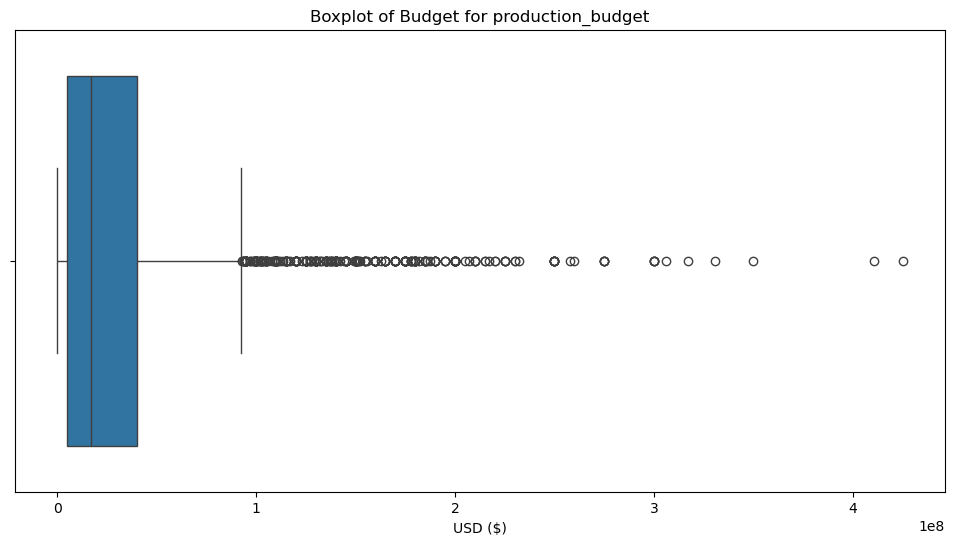

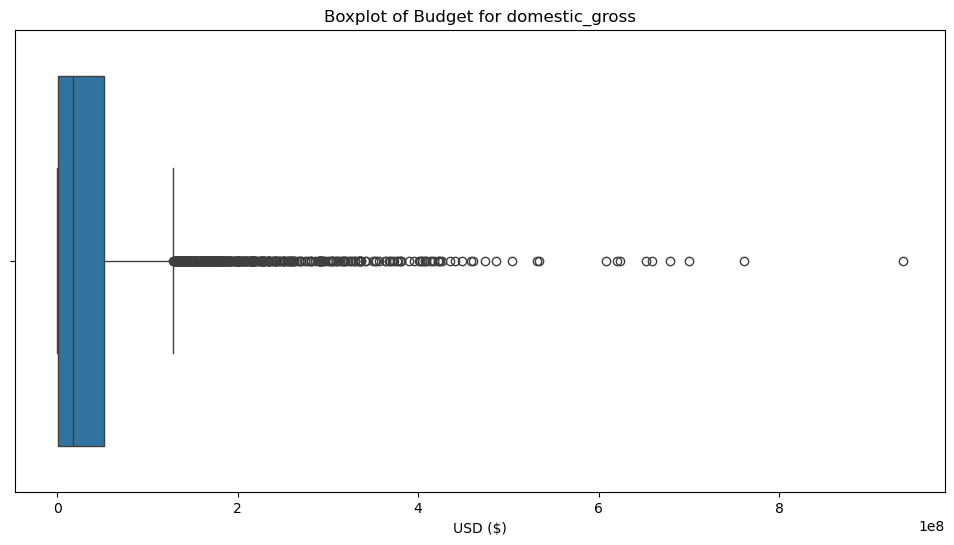

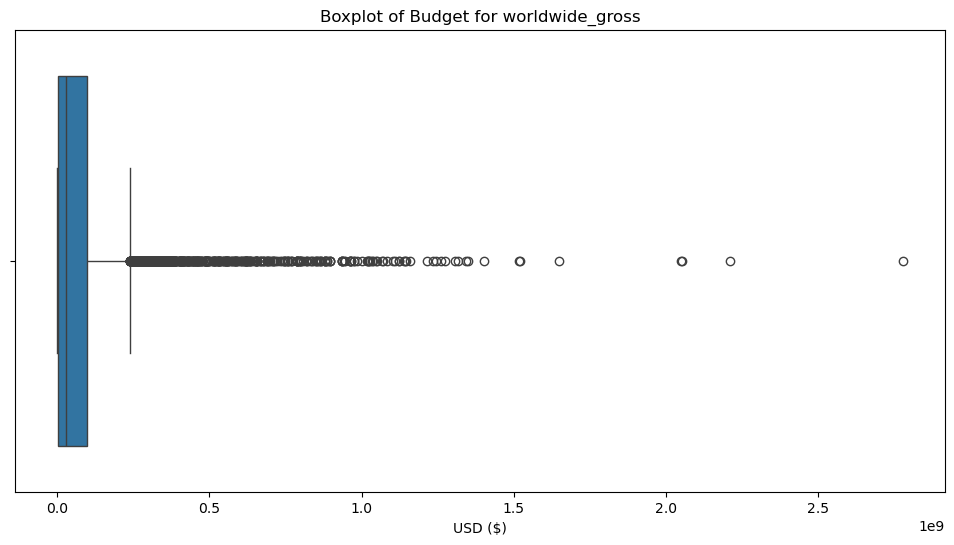

In [33]:
# Select columns for plotting
int_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in int_cols:
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.boxplot(x = movie_budgets[col], ax = ax)
    ax.set_title(f'Boxplot of Budget for {col}')
    ax.set_xlabel("USD ($)")
    plt.show()

In [35]:
# removing the outliers in the gross columns 

for col in int_cols:
    Q1 = movie_budgets[col].quantile(0.25)
    Q3 = movie_budgets[col].quantile(0.75)
    IQR = Q3 - Q1

# for correcting the dataframe without outliers present     
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    movie_budgets = movie_budgets[(movie_budgets[col] >= lower_bound) & (movie_budgets[col] <= upper_bound)]

In [36]:
movie_budgets.shape

(4657, 7)

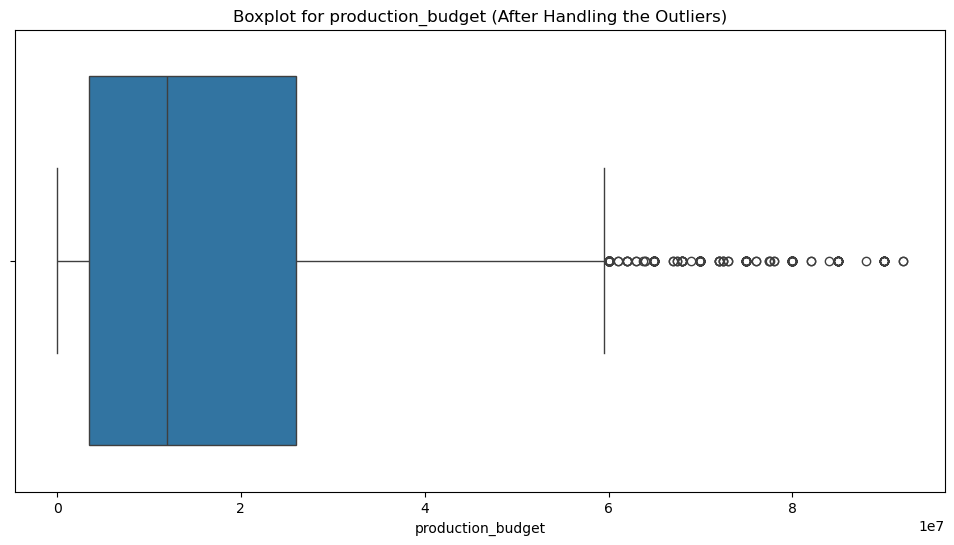

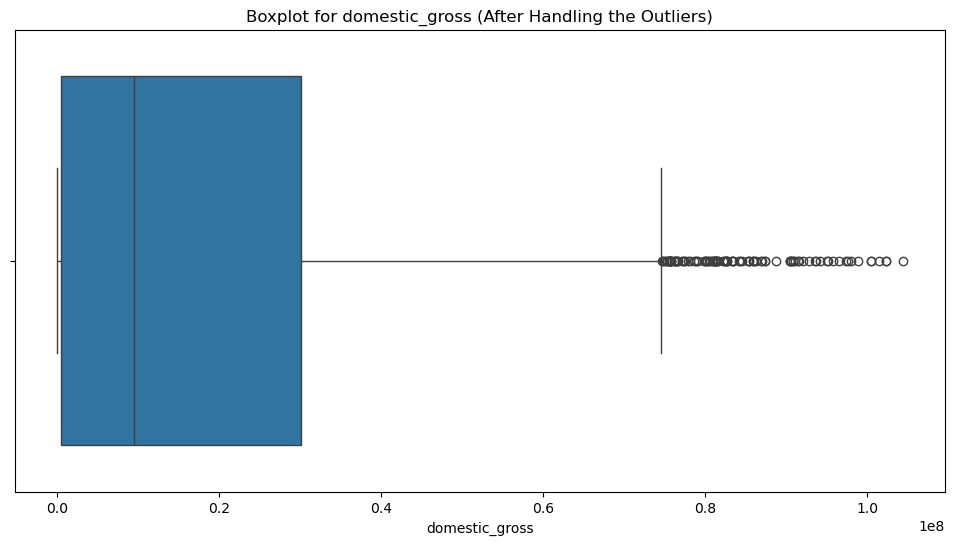

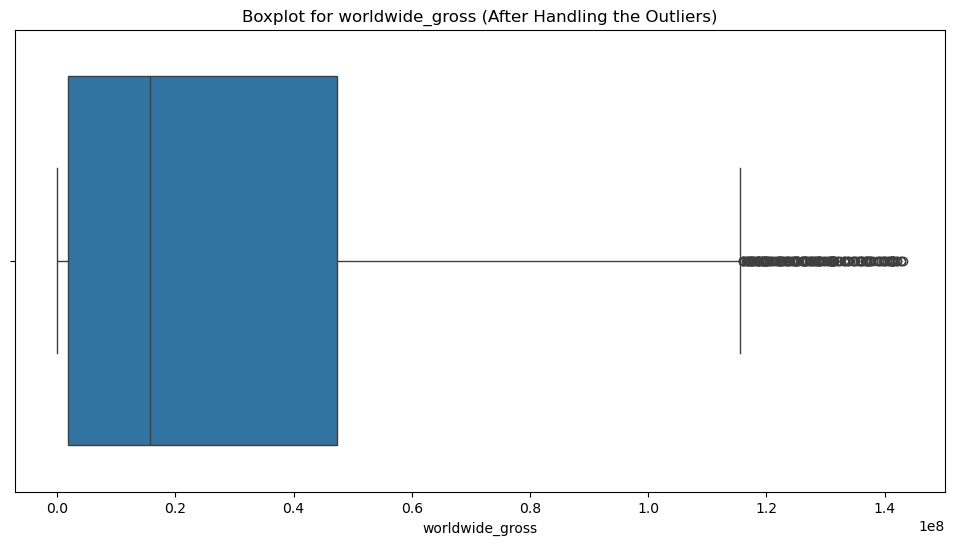

In [37]:
# plotting after handling the outliers

for col in int_cols:
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.boxplot(x = movie_budgets[col], ax = ax)
    ax.set_title(f'Boxplot for {col} (After Handling the Outliers)')
    plt.show()